# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os

In [3]:
base_dir = '/content/drive/My Drive/data'

In [4]:
os.listdir(base_dir)

['test.p',
 'valid.p',
 'train.p',
 'signnames.csv',
 'rtsd-r1',
 'test_images',
 'models']

In [5]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join(base_dir, 'train.p')
validation_file= os.path.join(base_dir, 'valid.p')
testing_file = os.path.join(base_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train = train['features'], train['labels']
X_valid_raw, y_valid = valid['features'], valid['labels']
X_test_raw, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
import numpy as np
import tensorflow as tf
import pandas
from tensorflow.keras.optimizers import Adam

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_raw.shape[0]

# TODO: Number of validation examples
n_validation = X_valid_raw.shape[0]

# TODO: Number of testing examples.
n_test = X_test_raw.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test_raw[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [8]:
sign_codes_file = os.path.join(base_dir, 'signnames.csv')
sign_codes = pandas.read_csv(sign_codes_file)
# sign_codes = sign_codes.set_index('ClassId')
print(sign_codes)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from textwrap import wrap
# Visualizations will be shown in the notebook.
%matplotlib inline

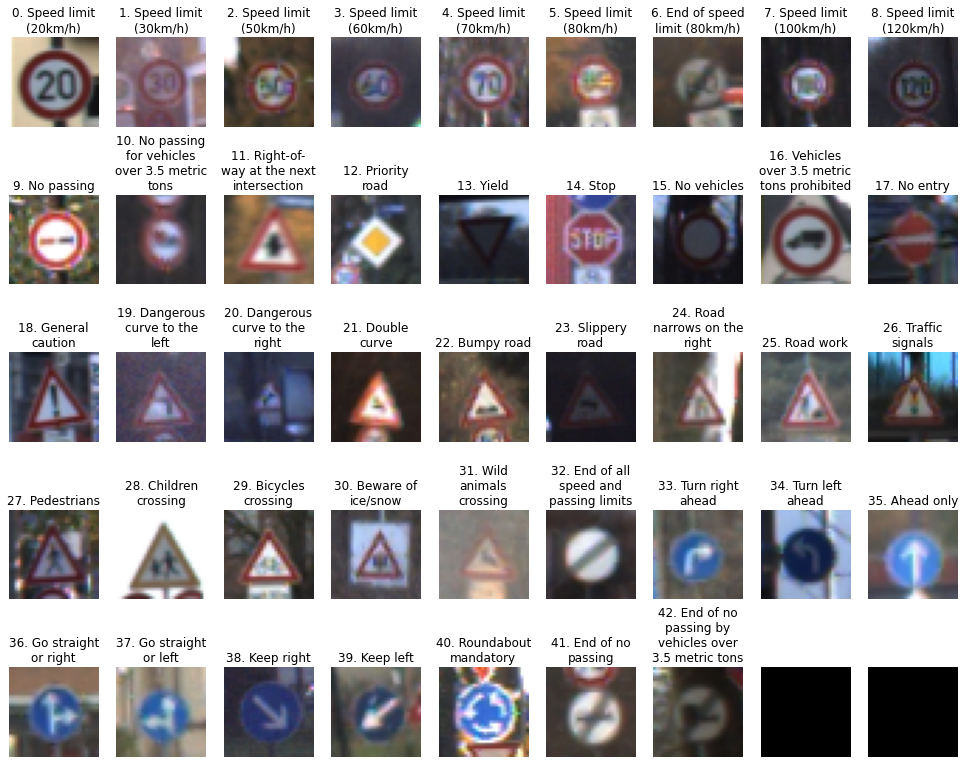

In [10]:
f, plts = plt.subplots(5, 9, figsize=(17,14))
plts = plts.flatten()
for i in range(len(plts)):
    if i < n_classes:
        imagesOfClass = np.nonzero(y_train==i)[0]
        imgId = imagesOfClass[0]

        plts[i].imshow(((X_train_raw[imgId]/float(np.max(X_train_raw[imgId])))*255).astype('uint8'))
        title = str(sign_codes['ClassId'][i]) + '. ' + str(sign_codes['SignName'][ sign_codes['ClassId'][i] ])
        plts[i].set_title('\n'.join(wrap(title, 15)))
    else:
        plts[i].imshow(np.ones((1,1,3), dtype='uint8')*0)
    plts[i].axis('off')

#### Distribution of signs in the datasets

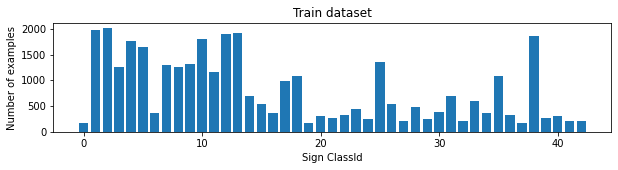

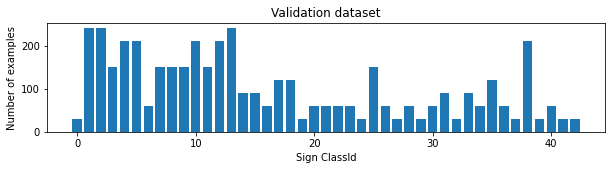

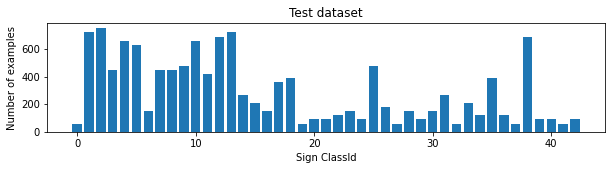

In [11]:
hist = np.histogram(y_train, bins = n_classes)

plt.figure(figsize=(10,2))
plt.bar(range(n_classes), hist[0])
plt.title('Train dataset')
plt.xlabel('Sign ClassId')
plt.ylabel('Number of examples')
plt.show()

hist = np.histogram(y_valid, bins = n_classes)

plt.figure(figsize=(10,2))
plt.bar(range(n_classes), hist[0])
plt.title('Validation dataset')
plt.xlabel('Sign ClassId')
plt.ylabel('Number of examples')
plt.show()

hist = np.histogram(y_test, bins = n_classes)

plt.figure(figsize=(10,2))
plt.bar(range(n_classes), hist[0])
plt.title('Test dataset')
plt.xlabel('Sign ClassId')
plt.ylabel('Number of examples')
plt.show()

> The distribution is almost the same in all 3 datasets

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normData(x):
    return (x - 127.5) / 127.5

In [13]:
X_train = normData(X_train_raw)
X_valid = normData(X_valid_raw)
X_test  = normData(X_test_raw)

### Model Architecture

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(n_classes)
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

> Dropout with keep probability about 0.75 on the 2 last hidden layers gives the most accurate model. At least it is better than dropout on only one of the two last hidden layers.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [22]:
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.001

In [23]:
opt = Adam(lr=rate, decay=rate / EPOCHS)
model.compile(optimizer=opt, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [24]:
H = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
1088/1088 [==============================] - 4s 4ms/step - loss: 1.3449 - accuracy: 0.6103 - val_loss: 0.5512 - val_accuracy: 0.8308
Epoch 2/10
1088/1088 [==============================] - 4s 3ms/step - loss: 0.3960 - accuracy: 0.8767 - val_loss: 0.3361 - val_accuracy: 0.9061
Epoch 3/10
1088/1088 [==============================] - 4s 3ms/step - loss: 0.2420 - accuracy: 0.9260 - val_loss: 0.2672 - val_accuracy: 0.9227
Epoch 4/10
1088/1088 [==============================] - 4s 3ms/step - loss: 0.1759 - accuracy: 0.9457 - val_loss: 0.2485 - val_accuracy: 0.9315
Epoch 5/10
1088/1088 [==============================] - 4s 3ms/step - loss: 0.1320 - accuracy: 0.9589 - val_loss: 0.2556 - val_accuracy: 0.9333
Epoch 6/10
1088/1088 [==============================] - 4s 3ms/step - loss: 0.1143 - accuracy: 0.9664 - val_loss: 0.2370 - val_accuracy: 0.9383
Epoch 7/10
1088/1088 [==============================] - 4s 3ms/step - loss: 0.0935 - accuracy: 0.9719 - val_loss: 0.2697 - val_accuracy:

In [25]:
import time

In [26]:
# Save the model
models_folder = os.path.join(base_dir, 'models')
export_path = os.path.join(models_folder, 'lenet-5_{}'.format(time.strftime('%d%m%y_%H_%M')))
model.save(export_path, save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/data/models/lenet-5_291020_08_40/assets


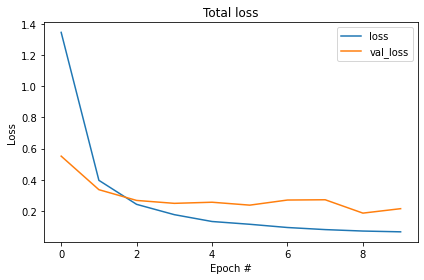

In [27]:
# plot the total loss and specific losses
lossNames = [x for x in list(H.history.keys()) if 'loss' in x and not 'val' in x]
l = lossNames[0]
# plt.style.use("ggplot")
# plot the loss for both the training and validation data
title = "Loss for {}".format(l) if l != "loss" else "Total loss"
plt.title(title)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.plot(np.arange(0, EPOCHS), H.history[l], label=l)
plt.plot(np.arange(0, EPOCHS), H.history["val_" + l],
    label="val_" + l)
plt.legend()
# save the losses figure
plt.tight_layout()

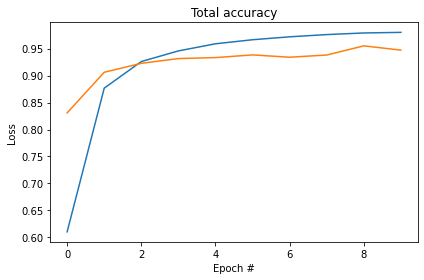

In [28]:
# create a new figure for the accuracies
accuracyNames = [x for x in list(H.history.keys()) if 'accuracy' in x and not 'val' in x]
l = accuracyNames[0]
# plot the loss for both the training and validation data

plt.title("Total {}".format(l))
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.plot(np.arange(0, EPOCHS), H.history[l], label=l)
plt.plot(np.arange(0, EPOCHS), H.history["val_" + l],
    label="val_" + l)
# save the accuracies figure
plt.tight_layout()

In [29]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

395/395 - 1s - loss: 0.3481 - accuracy: 0.9363

Test accuracy: 0.936262845993042


#### More detailed analysis of the model performance

Consider ways to do a more detailed analysis of model performance by looking at predictions in more detail. For example, calculate the precision and recall for each traffic sign type from the test set and then compare performance on these five new images..

In [30]:
from sklearn.metrics import classification_report

In [31]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [32]:
predictions = probability_model.predict(X_test)

In [33]:
predictions[0]

array([1.6642758e-18, 1.3881483e-18, 4.9299078e-25, 8.1994750e-12,
       1.2679056e-21, 1.0926437e-11, 4.9992101e-14, 1.0553145e-07,
       9.3648969e-16, 1.4356470e-12, 1.8060465e-12, 1.8359194e-12,
       1.1754795e-19, 1.6021287e-21, 2.2715279e-24, 4.5397682e-27,
       9.9999988e-01, 1.8429366e-19, 1.9151333e-16, 4.2732335e-20,
       4.4835871e-11, 9.7101343e-23, 5.2372217e-32, 8.5980086e-16,
       1.2327102e-26, 3.1824532e-25, 5.3749760e-24, 1.9175397e-22,
       1.4359811e-12, 6.4327392e-15, 2.6756776e-16, 2.3867951e-18,
       9.9888483e-12, 3.7141496e-21, 2.5584409e-18, 4.4506082e-17,
       3.0362804e-16, 5.0326888e-24, 1.2893888e-17, 8.1336639e-31,
       8.1451024e-13, 1.4686634e-13, 4.0064287e-13], dtype=float32)

In [34]:
np.argmax(predictions[0])

16

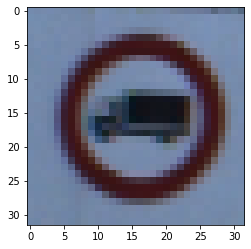

In [35]:
plt.imshow(np.uint8(X_test[0]*127.5+127.5))

In [36]:
top_predictions = np.argmax(predictions, axis=1)

In [37]:
print(classification_report(y_test,top_predictions))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        60
           1       0.93      0.96      0.95       720
           2       0.92      0.97      0.94       750
           3       0.88      0.95      0.91       450
           4       0.96      0.95      0.95       660
           5       0.90      0.87      0.88       630
           6       0.93      0.87      0.90       150
           7       0.97      0.82      0.89       450
           8       0.92      0.95      0.94       450
           9       0.97      0.99      0.98       480
          10       0.96      0.98      0.97       660
          11       0.92      0.96      0.94       420
          12       0.99      0.98      0.98       690
          13       0.99      0.99      0.99       720
          14       0.99      0.99      0.99       270
          15       0.97      0.98      0.97       210
          16       1.00      0.99      1.00       150
          17       0.99    

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [38]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from matplotlib import image as mpimg
import glob

In [39]:
images = glob.glob(os.path.join(base_dir, 'test_images/*.jpg'))

In [40]:
imgs = []
for imgPath in images:
    img_raw = mpimg.imread(imgPath)
    img = normData(img_raw)
    imgs.append(img)
    
imgs = np.array(imgs)

### Predict the Sign Type for Each Image

In [41]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [42]:
predictions = probability_model.predict(imgs)

In [43]:
distribution = predictions.argsort(axis=-1)[:, :-6:-1]
distribution.shape

(6, 5)

In [44]:
predictions.argsort(axis=-1)[0]

array([21, 27, 24, 29, 31,  7, 14,  2, 22, 18, 11, 15,  6, 28, 39,  1,  4,
       19, 30, 12,  8,  0, 23, 26, 42, 37, 17, 32, 16,  5, 25, 41,  3, 13,
       20, 10,  9, 33, 40, 35, 34, 36, 38])

In [45]:
predictions.argsort(axis=-1)[0, :-6:-1]

array([38, 36, 34, 35, 40])

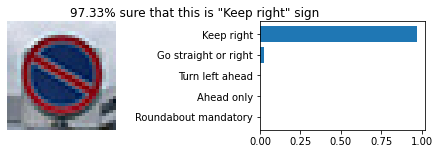

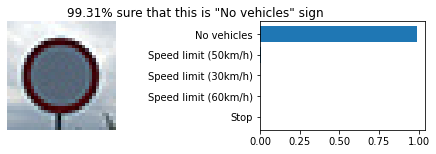

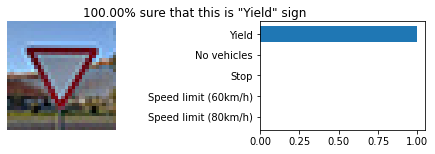

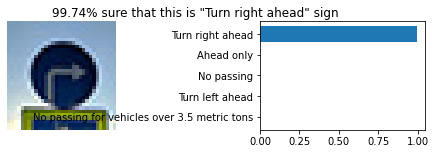

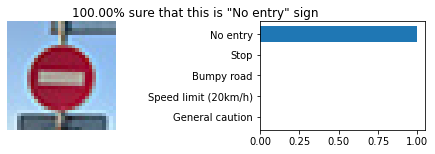

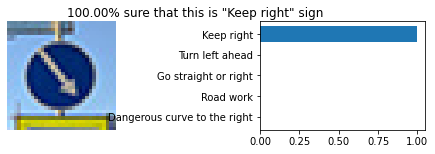

In [46]:
for i in range(len(distribution)):
    plt.figure(figsize=(8,2))
    plt.suptitle('{:.2f}% sure that this is "{}" sign'.format(predictions[i][distribution[i][0]]*100.0, 
                                                              sign_codes['SignName'][distribution[i][0]]))
    plt.subplots_adjust(wspace=0.7)

    plt.subplot(121)
    plt.axis('off')
    plt.imshow((imgs[i]+1.0)/2.0)

    plt.subplot(122)
    plt.barh(range(5)[::-1], predictions[i][distribution[i]], 
             tick_label=sign_codes['SignName'][distribution[i]])
    plt.show()

We misclassified 'No waiting' and 'Turn right ahead' signs, because there was no 'No waiting' sign in the training set and the 'Turn right ahead' sign is slightly different in Russia.